In [109]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_validate, cross_val_score, train_test_split

In [110]:
dpsdf1 = pd.read_csv("cleaned_dataset.csv")
dpsdf1 = dpsdf1.drop("id",1)
dpsdf1data = dpsdf1[dpsdf1.columns[:-1]]
dpsdf1class = dpsdf1[dpsdf1.columns[-1]]

In [111]:
pca = PCA(n_components=2, whiten=True).fit(dpsdf1data)
dpsdf1data = pca.transform(dpsdf1data)
print('Preserved Variance: ', sum(pca.explained_variance_ratio_))

Preserved Variance:  0.7623831402133543


In [112]:
npdpsdf1data = np.array(dpsdf1data)
adddatabias = np.zeros((int(npdpsdf1data.shape[0]),1))
adddatabias.fill(-1)
npdpsdf1data = (np.append(npdpsdf1data, adddatabias, axis=1))
npdpsdf1class = np.array(dpsdf1class)
flag = 0

In [113]:
if(flag == 0):
    npdpsdf1class[npdpsdf1class < 3] = -1
    npdpsdf1class[npdpsdf1class > 3] = 1
    flag = 1
# print(npdpsdf1class)

In [114]:
dpsdata_train, dpsdata_test, dpsclass_train, dpsclass_test = train_test_split(npdpsdf1data, npdpsdf1class, test_size= .4,random_state=0)

In [159]:
class SVM():
    def __init__(self, dpstraindata=0, dpstrainclass=0, dpstestdata=0, dpstestclass=0, weights=0, confusion=2, learning_rate=1, predicted=0, parameters=0, entiredata=0, entireclass=0):
        self.confusionmat = [[0 for x in range(confusion)] for y in range(confusion)]
        self.confusionmatset = 0
        self.traindata = dpstraindata
        self.trainclass = dpstrainclass
        self.testdata = dpstestdata
        self.testclass = dpstestclass
        self.learning_rate = learning_rate
        self.predicted = predicted
        self.parameters = parameters
        self.weights = weights
        self.predictedsign = 0
        self.entiredata = entiredata
        self.entireclass = entireclass
        
    
    def train(self, dpsdataparam=0, dpsclassparam=0, epochs=10000):
        try:
            if(dpsdataparam == 0):
                pass
            else:
                self.traindata = dpsdataparam
        except:
            self.traindata = dpsdataparam
            
        try:
            if(dpsclassparam == 0):
                pass
            else:
                self.trainclass = dpsclassparam
        except:
            self.trainclass = dpsclassparam
            
        self.weights = np.zeros(3)
        
        learning_rate = 1
        
        for epoch in range(epochs):
            
            counter = 0
            for i, j, k in self.traindata:
                dotprod = np.dot(np.array([i,j, k]), self.weights)
                
                if(self.trainclass[counter] * dotprod < 1):
                    self.weights = self.weights + learning_rate * ((self.trainclass[counter] * self.traindata[counter]) - (2 * (1/epochs) * self.weights))
                    
                else:
                    self.weights = self.weights + learning_rate * (-2 * (1/epochs) * self.weights)
                    
                counter += 1

        return self.weights

    def predict(self, dpsdataparam=0, w=0):
        try:
            if(dpsdataparam == 0):
                pass
            else:
                self.testdata = dpsdataparam
        except:
            self.testdata = dpsdataparam
            
        weights = w
        
        try:
            if(w == 0):
                print("Precomputed weights used")
                weights = self.weights
                
        except:
            pass
        
        self.pred = list()
        
        for i, j, k in self.testdata:
            self.pred.append(np.dot(np.array([i, j, k]), weights))
        
        return self.pred
    
    def computeconfusionmat(self, dpspredicted=0, dpsobserved=0):
        self.predictedsign = np.sign(dpspredicted)
        
        try:
            if(dpsobserved == 0):
                pass
            else:
                self.testclass = dpsobserved
        except:
            self.testclass = dpsobserved
        
        for i in range(len(self.predicted)):
            if(self.predictedsign[i] == self.testclass[i]):
                if(self.testclass[i] == 1):
                    self.confusionmat[1][1] += 1
                else:
                    self.confusionmat[0][0] += 1
            else:
                if(self.testclass[i] == 1):
                    self.confusionmat[1][0] += 1
                else:
                    self.confusionmat[0][1] += 1
        self.confusionmatset = 1
        return self.confusionmat

    def computeparameters(self):
        if(self.confusionmatset != 1):
            print("Please compute the Confusion Matrix")
            return -1
        
        TP = self.confusionmat[1][1]
        TN = self.confusionmat[0][0]
        FP = self.confusionmat[0][1]
        FN = self.confusionmat[1][0]

        self.parameters = [0 for i in range(4)]
        # 1. Accuracy
        # 2. Precision
        # 3. Recall
        # 4. Specificity
        self.parameters[0] = (TP + TN)/(TP + TN + FP + FN)
        self.parameters[1] = (TP) / (TP + FP)
        self.parameters[2] = (TP) / (TP + FN)
        self.parameters[3] = (TN) / (TN + FP)

        return self.parameters

    def printparams(self):    
        self.parameters = self.computeparameters()
        
        try:
            if(self.parameters == -1):
                return -1
        except:
            pass
        
        print("Accuracy\t : - ",self.parameters[0])
        print("Precision\t : - ",self.parameters[1])
        print("Recall\t\t : - ",self.parameters[2])
        print("Specificity\t : - ",self.parameters[3])
    
    def accuracy(self, original=0, predicted=0, testdata=0):
        try:
            if(original == 0):
                pass
        
        except:
            self.testclass = original
        
        try:
            if(predicted == 0):
                pass
            else:
                self.predicted = predicted
        except:
            self.predicted = predicted
            
        
        try:
            if(testdata == 0):
                pass
        
        except:
            self.testdata = testdata
        
        try:
            if(self.predicted == 0):
                pass
        
        except:
            self.predicted = self.predict(self.testdata)
            
        signedop = np.sign(self.predicted)
        correct = np.sum(signedop == self.testclass)
        return ((correct/len(signedop)*100))
    
    def KFOLDaccuracy(self, splits=6, data=0, classip=0):
        try:
            if(data != 0):
                self.entiredata = data
            else:
                pass
        except:
            self.entiredata = data
            
        try:
            if(data != 0):
                self.entireclass = classip
            else:
                pass
        except:
            self.entireclass = classip
            
        kfold = KFold(n_splits=splits, random_state=None, shuffle=False)
        accuracies = list()
        
        pltnumber = 1
        for tr_ind, te_ind in kfold.split(self.entiredata, self.entireclass):
            self.traindata = self.entiredata[tr_ind]
            self.testdata = self.entiredata[te_ind]
            self.trainclass = self.entireclass[tr_ind]
            self.testclass = self.entireclass[te_ind]
            
            self.weights = self.train(self.traindata, self.trainclass, epochs=10000)
            self.predicted = self.predict(self.testdata, self.weights)
            accuracies.append(self.accuracy(self.testclass, self.predicted))
            
            self.plothyperplane(self.testdata, self.testclass, pltnumber=pltnumber, weights=self.weights)
            pltnumber += 1
            
        accuracies = np.array(accuracies)
        meanacc = np.mean(accuracies)
        return meanacc
    
    def plothyperplane(self, testdata=0, testclass=0, pltnumber=1, weights=0):
        try:
            if(testdata != 0):
                self.testdata = testdata
            else:
                pass
        except:
            self.testdata = testdata
        
        try:
            if(testclass != 0):
                self.testclass = testclass
            else:
                pass
        except:
            self.testclass = testclass
        
        try:
            if(weights != 0):
                self.weights = weights
            else:
                pass
        except:
            self.weights = weights
            
        plt.figure(pltnumber)
        
        counter = 0
        for i, j, k in self.testdata:
            if(self.testclass[counter] == 1):
                plt.scatter(i, j, s=120, marker='+', linewidths=2, color='red')
            else:
                plt.scatter(i, j, s=120, marker='_', linewidths=2, color='green')
            counter += 1

        a = -self.weights[0] / self.weights[1]
        xx = np.linspace(-2,3)
        yy = a * xx - (self.weights[2] / self.weights[1])
        plt.plot(xx, yy, 'k--')
        plt.show()

In [160]:
svmobj = SVM()
weights = svmobj.train(dpsdata_train, dpsclass_train, epochs=50)
weights

array([ 2.2685351 , -0.82707704,  0.32602048])

In [161]:
predicted = svmobj.predict(dpsdata_test, weights)
# predicted

In [162]:
accuracy = svmobj.accuracy(dpsclass_test, predicted)
accuracy

94.28571428571428

In [163]:
svmobj.computeconfusionmat(predicted, dpsclass_test)

[[172, 8], [8, 92]]

In [164]:
svmobj.printparams()

Accuracy	 : -  0.9428571428571428
Precision	 : -  0.92
Recall		 : -  0.92
Specificity	 : -  0.9555555555555556


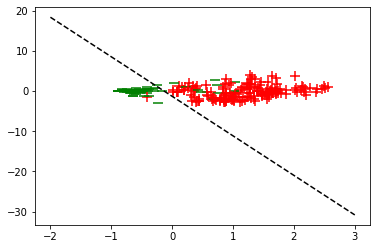

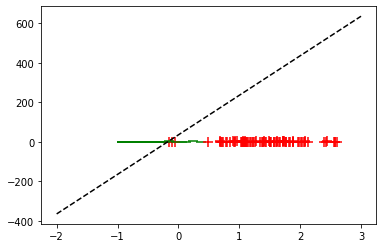

96.42611543184609

In [165]:
svmobj.KFOLDaccuracy(2, npdpsdf1data, npdpsdf1class)

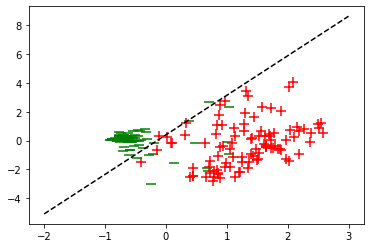

In [166]:
svmobj.plothyperplane(dpsdata_test, dpsclass_test, weights=weights)